# **1. EXPLORATORY DATA ANALYSIS**

In [2]:
#installing snowflake connector

!pip install snowflake-connector-python pandas

In [ ]:
pip install snowflake-connector-python


     ---------------------------------------- 0.0/65.0 kB ? eta -:--:--
     ---------------------------------------- 65.0/65.0 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/913.5 kB ? eta -:--:--
   -- ------------------------------------- 61.4/913.5 kB 1.7 MB/s eta 0:00:01
   ----- ---------------------------------- 122.9/913.5 kB 1.2 MB/s eta 0:00:01
   ------- -------------------------------- 174.1/913.5 kB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/913.5 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 286.7/913.5 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 337.9/913.5 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 389.1/913.5 kB 1.2 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/913.5 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 501.8/913.5 kB 1.2 MB/s eta 0:00:01
   ------------------------ --------------- 563.2/913.5 kB


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install tensorflow


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 1.9 MB/s eta 0:03:17
   ---------------------------------------- 0.1/377.0 MB 1.2 MB/s eta 0:05:19
   ---------------------------------------- 0.2/377.0 MB 1.3 MB/s eta 0:04:50
   ---------------------------------------- 0.2/377.0 MB 1.3 MB/s eta 0:05:02
   ---------------------------------------- 0.3/377.0 MB 1.3 MB/s eta 0:04:59
   ---------------------------------------- 0.3/377.0 MB 


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
#we import the necessary libraries for our project
import snowflake.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import getpass
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

In [61]:
#masking the password
passw = getpass.getpass(prompt='Enter your password: ')

print("Password saved")


Password entered successfully!


In [63]:
#connecting the notebook to the databse

conn = snowflake.connector.connect(
    user='SamwelM',
    password=passw,
    account='hj81070.north-europe.azure',
    warehouse='COMPUTE_WH',
    database='DATA',
    schema='PUBLIC'
)

In [64]:
#we query our databse and and load the data into a dataframe

query = "SELECT * FROM DATA"
data = pd.read_sql(query, conn)

C:\Temp\ipykernel_70292\2392323296.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [65]:
#closing the connection

conn.close()

## **Data Understanding**

In [66]:
#we preview our data
data

,AGE,GENDER,SMOKING,ALCOHOL_CONSUMPTION,OBESITY,FAMILY_HISTORY,DIABETES,SALT_INTAKE,DIET,STRESS_LEVEL,COUNTRY,HYPERTENSION
0,38,Male,False,False,False,False,False,False,False,False,South Africa,False
1,30,Female,False,False,False,False,False,False,False,False,South Africa,False
2,40,Male,False,False,False,False,False,False,False,False,South Africa,False
3,51,Male,True,True,False,True,False,True,False,True,South Africa,False
4,55,Female,True,True,True,True,True,True,True,True,South Africa,True
...,...,...,...,...,...,...,...,...,...,...,...,...
15995,52,Female,True,True,True,True,True,True,True,True,Nigeria,False
15996,61,Female,False,False,False,False,True,False,False,True,Nigeria,True
15997,77,Female,True,True,True,True,False,False,False,False,Nigeria,True
15998,62,Female,True,False,True,False,False,False,False,True,Nigeria,True


In [67]:
#we check the nature of the data in the columns
data.columns

Index(['AGE', 'GENDER', 'SMOKING', 'ALCOHOL_CONSUMPTION', 'OBESITY',
       'FAMILY_HISTORY', 'DIABETES', 'SALT_INTAKE', 'DIET', 'STRESS_LEVEL',
       'COUNTRY', 'HYPERTENSION'],
      dtype='object')

In [68]:
#we check the structure of this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  16000 non-null  int64 
 1   GENDER               16000 non-null  object
 2   SMOKING              16000 non-null  bool  
 3   ALCOHOL_CONSUMPTION  16000 non-null  bool  
 4   OBESITY              16000 non-null  bool  
 5   FAMILY_HISTORY       16000 non-null  bool  
 6   DIABETES             16000 non-null  bool  
 7   SALT_INTAKE          16000 non-null  bool  
 8   DIET                 16000 non-null  bool  
 9   STRESS_LEVEL         16000 non-null  bool  
 10  COUNTRY              16000 non-null  object
 11  HYPERTENSION         16000 non-null  bool  
dtypes: bool(9), int64(1), object(2)
memory usage: 515.8+ KB


In [69]:
#we check the shape of the data
rows, columns = data.shape
print(f"The dataset has {columns} columns and {rows} rows")

The dataset has 12 columns and 16000 rows


## **Data Cleaning**

**a. Missing & Duplicate Values**

In [70]:
#we create a function to check for missing data
def check_missing(df):
    missing = df.isnull().sum()

    print("Missing Values:")
    print(missing)

check_missing(data)

Missing Values:
AGE                    0
GENDER                 0
SMOKING                0
ALCOHOL_CONSUMPTION    0
OBESITY                0
FAMILY_HISTORY         0
DIABETES               0
SALT_INTAKE            0
DIET                   0
STRESS_LEVEL           0
COUNTRY                0
HYPERTENSION           0
dtype: int64


**b. Outliers**

We check for outliers in Age

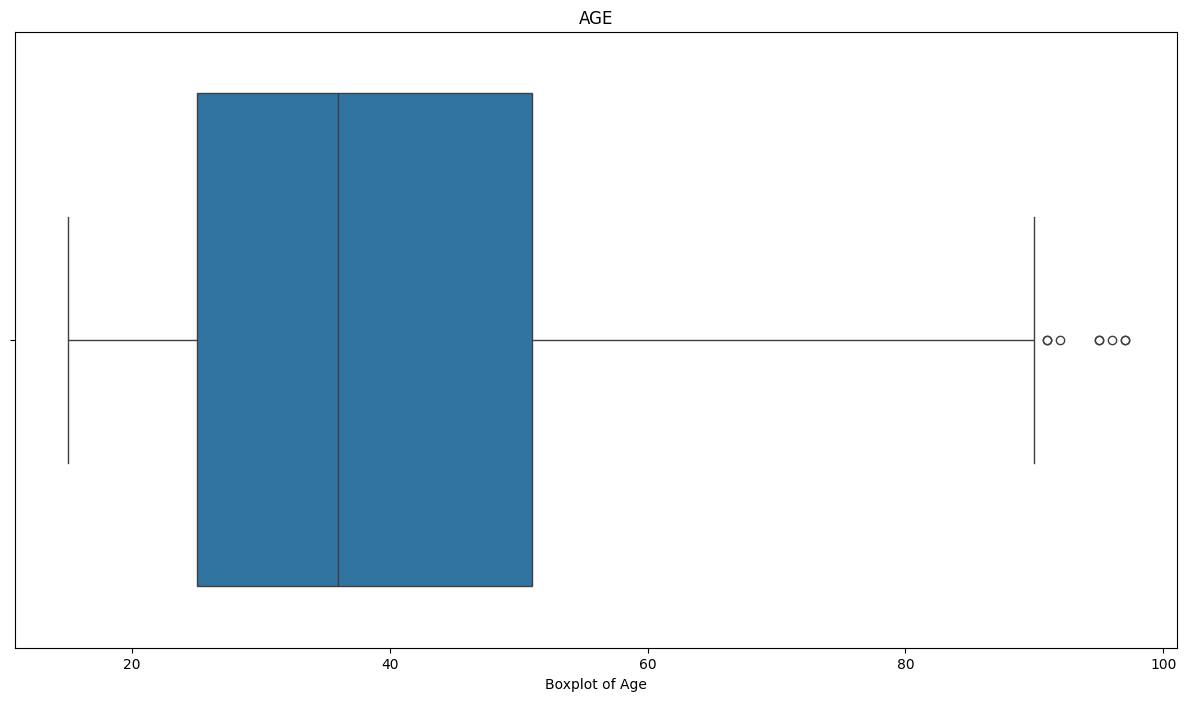

In [71]:
#we create a function that checks for outliers in a dataframe
def plot_boxplots(series, title='Boxplot', xlabel='Variable'):

    plt.figure(figsize=(15, 8))
    sns.boxplot(x=series)
    plt.title(title)
    plt.xlabel(xlabel)

    plt.show()

#we use this function
plot_boxplots(data['AGE'], 'AGE', 'Boxplot of Age')

In [72]:
#we check the summary statistics
data.describe()

,AGE
count,16000.000000
mean,38.919000
std,16.259304
min,15.000000
25%,25.000000
50%,36.000000
75%,51.000000
max,97.000000


In [20]:
#we check the count of unique values
data.nunique()

AGE                    81
GENDER                  2
SMOKING                 2
ALCOHOL_CONSUMPTION     2
OBESITY                 2
FAMILY_HISTORY          2
DIABETES                2
SALT_INTAKE             2
DIET                    2
STRESS_LEVEL            2
COUNTRY                 2
HYPERTENSION            2
dtype: int64

## **Univariate Analysis**

**a. Hypertension Prevalence**

In [73]:
#we check the count of hypertension cases
data['HYPERTENSION'].value_counts()

HYPERTENSION
False    9884
True     6116
Name: count, dtype: int64

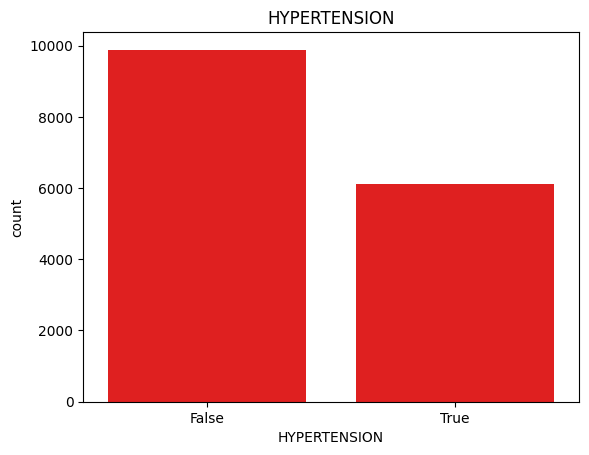

In [74]:
#we plot this in a countplot
sns.countplot(x='HYPERTENSION', data=data, color='red')
plt.title('HYPERTENSION')
plt.show()

**b. Count plots for all other binary variables: Sex, Smoking, Alcohol Consumption, Obesity, Family History, Diabetes, Diet, Stress level, Country**

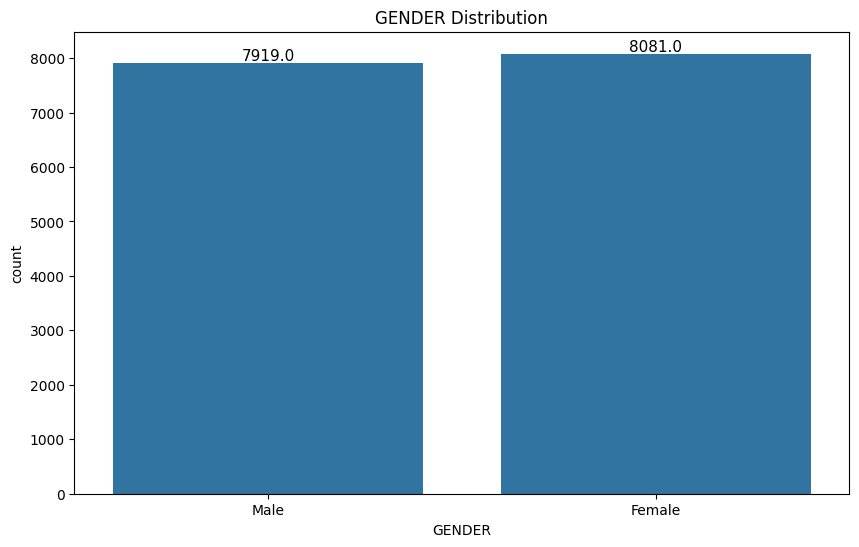

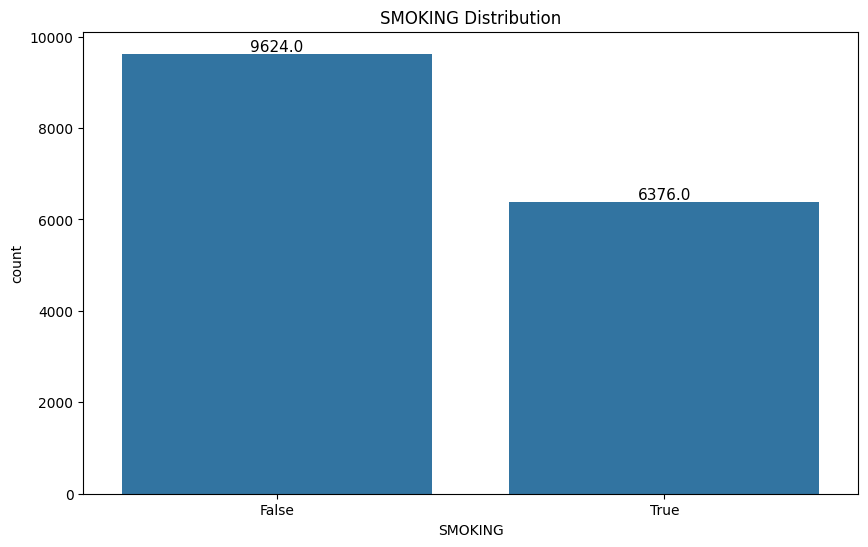

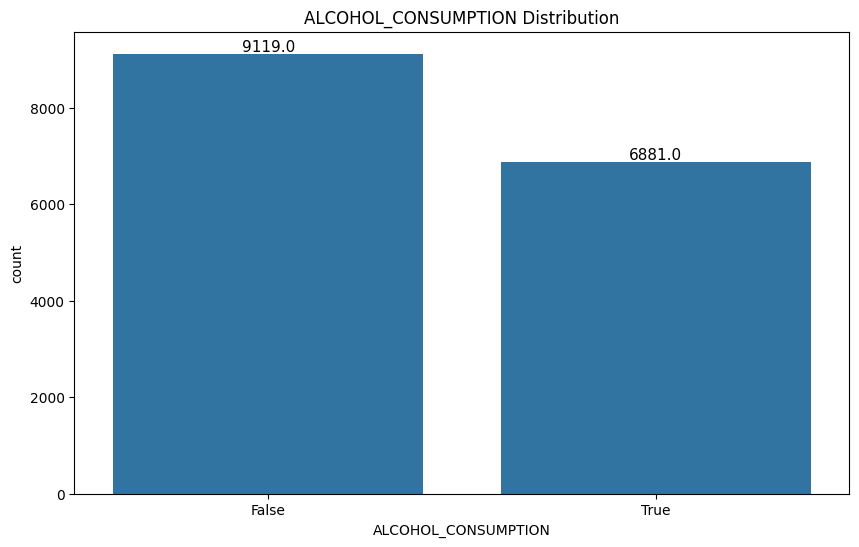

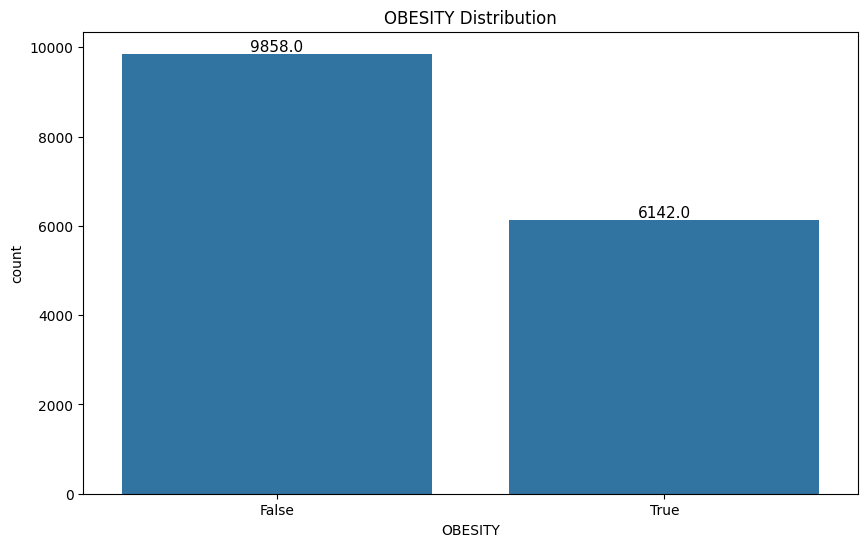

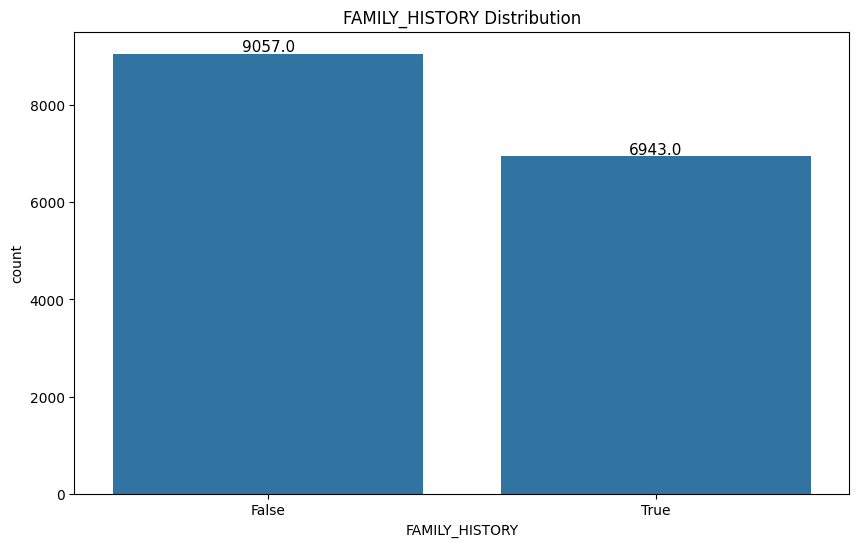

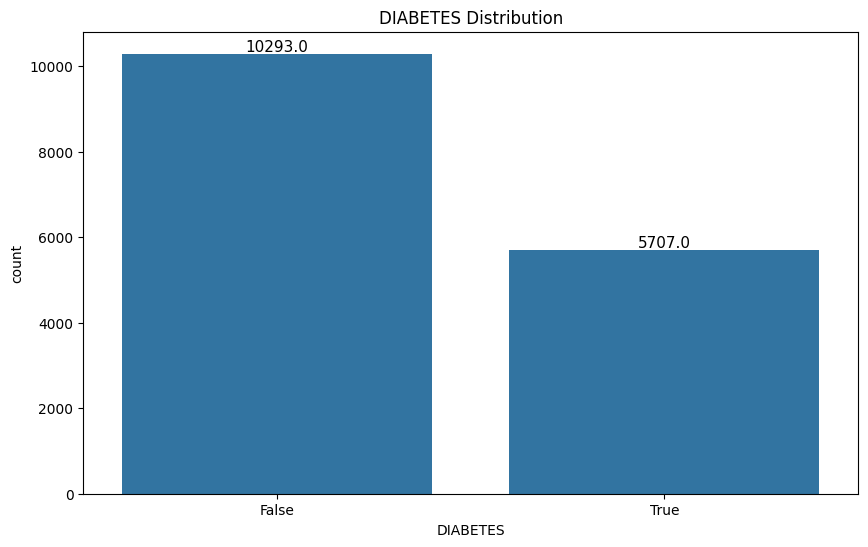

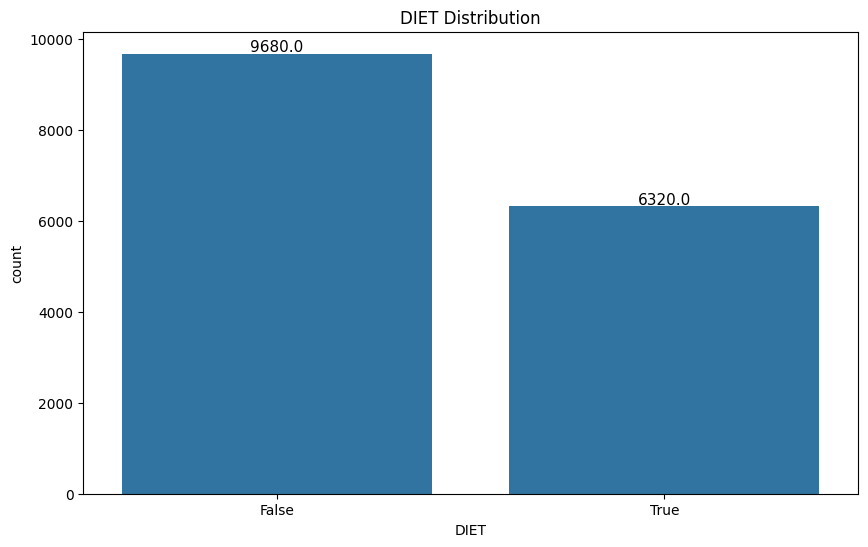

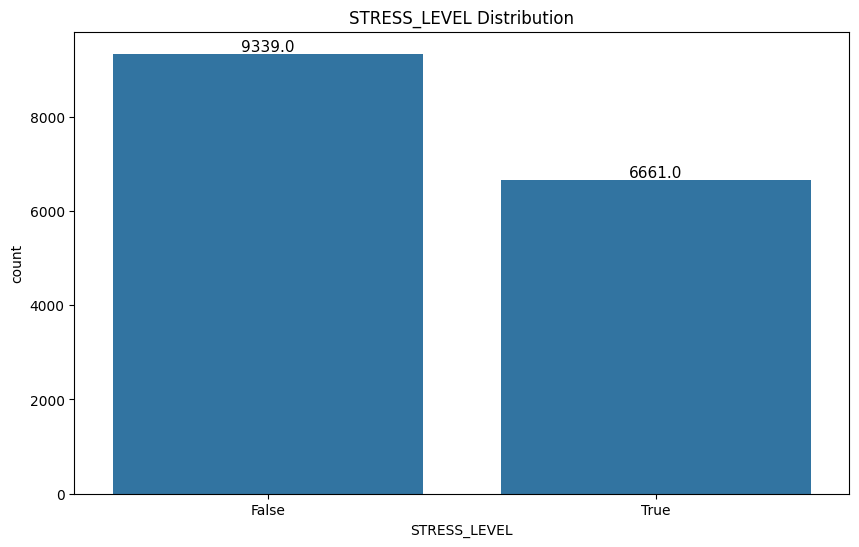

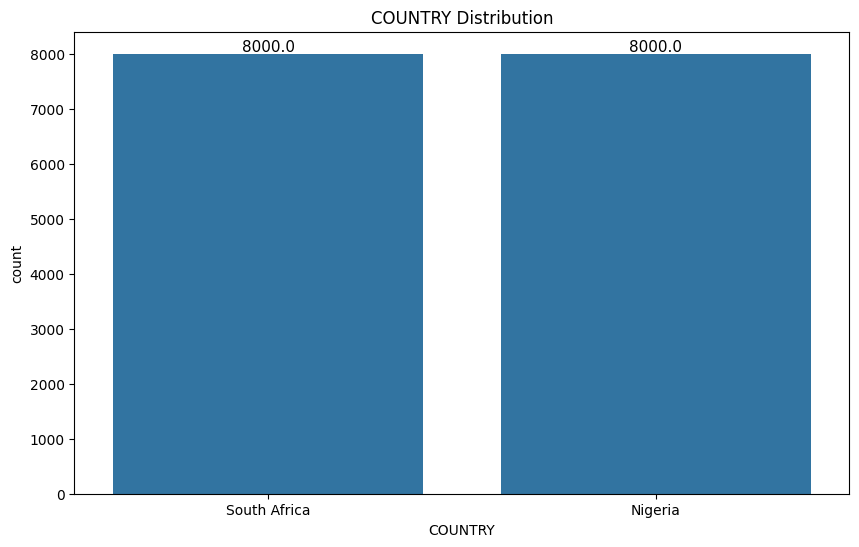

In [75]:
for col in ['GENDER', 'SMOKING', 'ALCOHOL_CONSUMPTION', 'OBESITY', 'FAMILY_HISTORY', 'DIABETES', 'DIET', 'STRESS_LEVEL', 'COUNTRY']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'{col} Distribution')

    # Add value counts on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.show()

**c. Distribution of Age**

Text(0.5, 1.0, 'Distribution of Age')

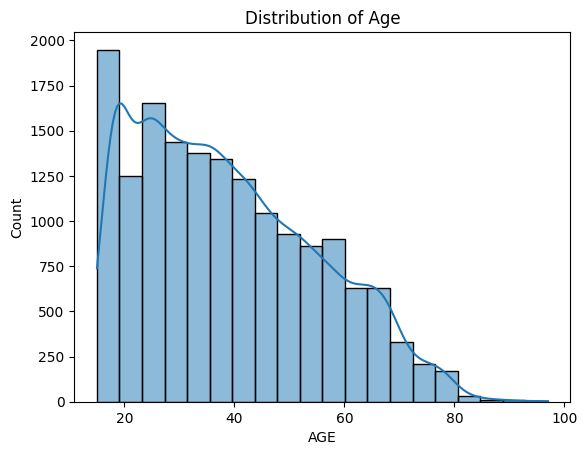

In [76]:
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')

## **2. Multivariate Analysis**

### **Label Encoding**

In [77]:
data.head(3)

,AGE,GENDER,SMOKING,ALCOHOL_CONSUMPTION,OBESITY,FAMILY_HISTORY,DIABETES,SALT_INTAKE,DIET,STRESS_LEVEL,COUNTRY,HYPERTENSION
0,38,Male,False,False,False,False,False,False,False,False,South Africa,False
1,30,Female,False,False,False,False,False,False,False,False,South Africa,False
2,40,Male,False,False,False,False,False,False,False,False,South Africa,False


In [78]:
#converting values in the 'GENDER' column
gender_map = {'Male': 0, 'Female': 1}
data['GENDER'] = data['GENDER'].map(gender_map)

#converting columns from True/False to 1/0
bool_columns = ['SMOKING', 'ALCOHOL_CONSUMPTION', 'OBESITY', 'FAMILY_HISTORY',
                'DIABETES', 'SALT_INTAKE', 'DIET', 'STRESS_LEVEL', 'HYPERTENSION']

# Map True/False to 1/0 in the specified columns
bool_map = {False: 0, True: 1}
for col in bool_columns:
    data[col] = data[col].map(bool_map)

#converting values in the 'COUNTRY' column
country_map = {'South Africa': 0, 'Nigeria': 1}
data['COUNTRY'] = data['COUNTRY'].map(country_map)

# Displaying the first few rows of the transformed data
data.head()

,AGE,GENDER,SMOKING,ALCOHOL_CONSUMPTION,OBESITY,FAMILY_HISTORY,DIABETES,SALT_INTAKE,DIET,STRESS_LEVEL,COUNTRY,HYPERTENSION
0,38,0,0,0,0,0,0,0,0,0,0,0
1,30,1,0,0,0,0,0,0,0,0,0,0
2,40,0,0,0,0,0,0,0,0,0,0,0
3,51,0,1,1,0,1,0,1,0,1,0,0
4,55,1,1,1,1,1,1,1,1,1,0,1


**a. Pair Plot for Numeric Features V Hypertension**

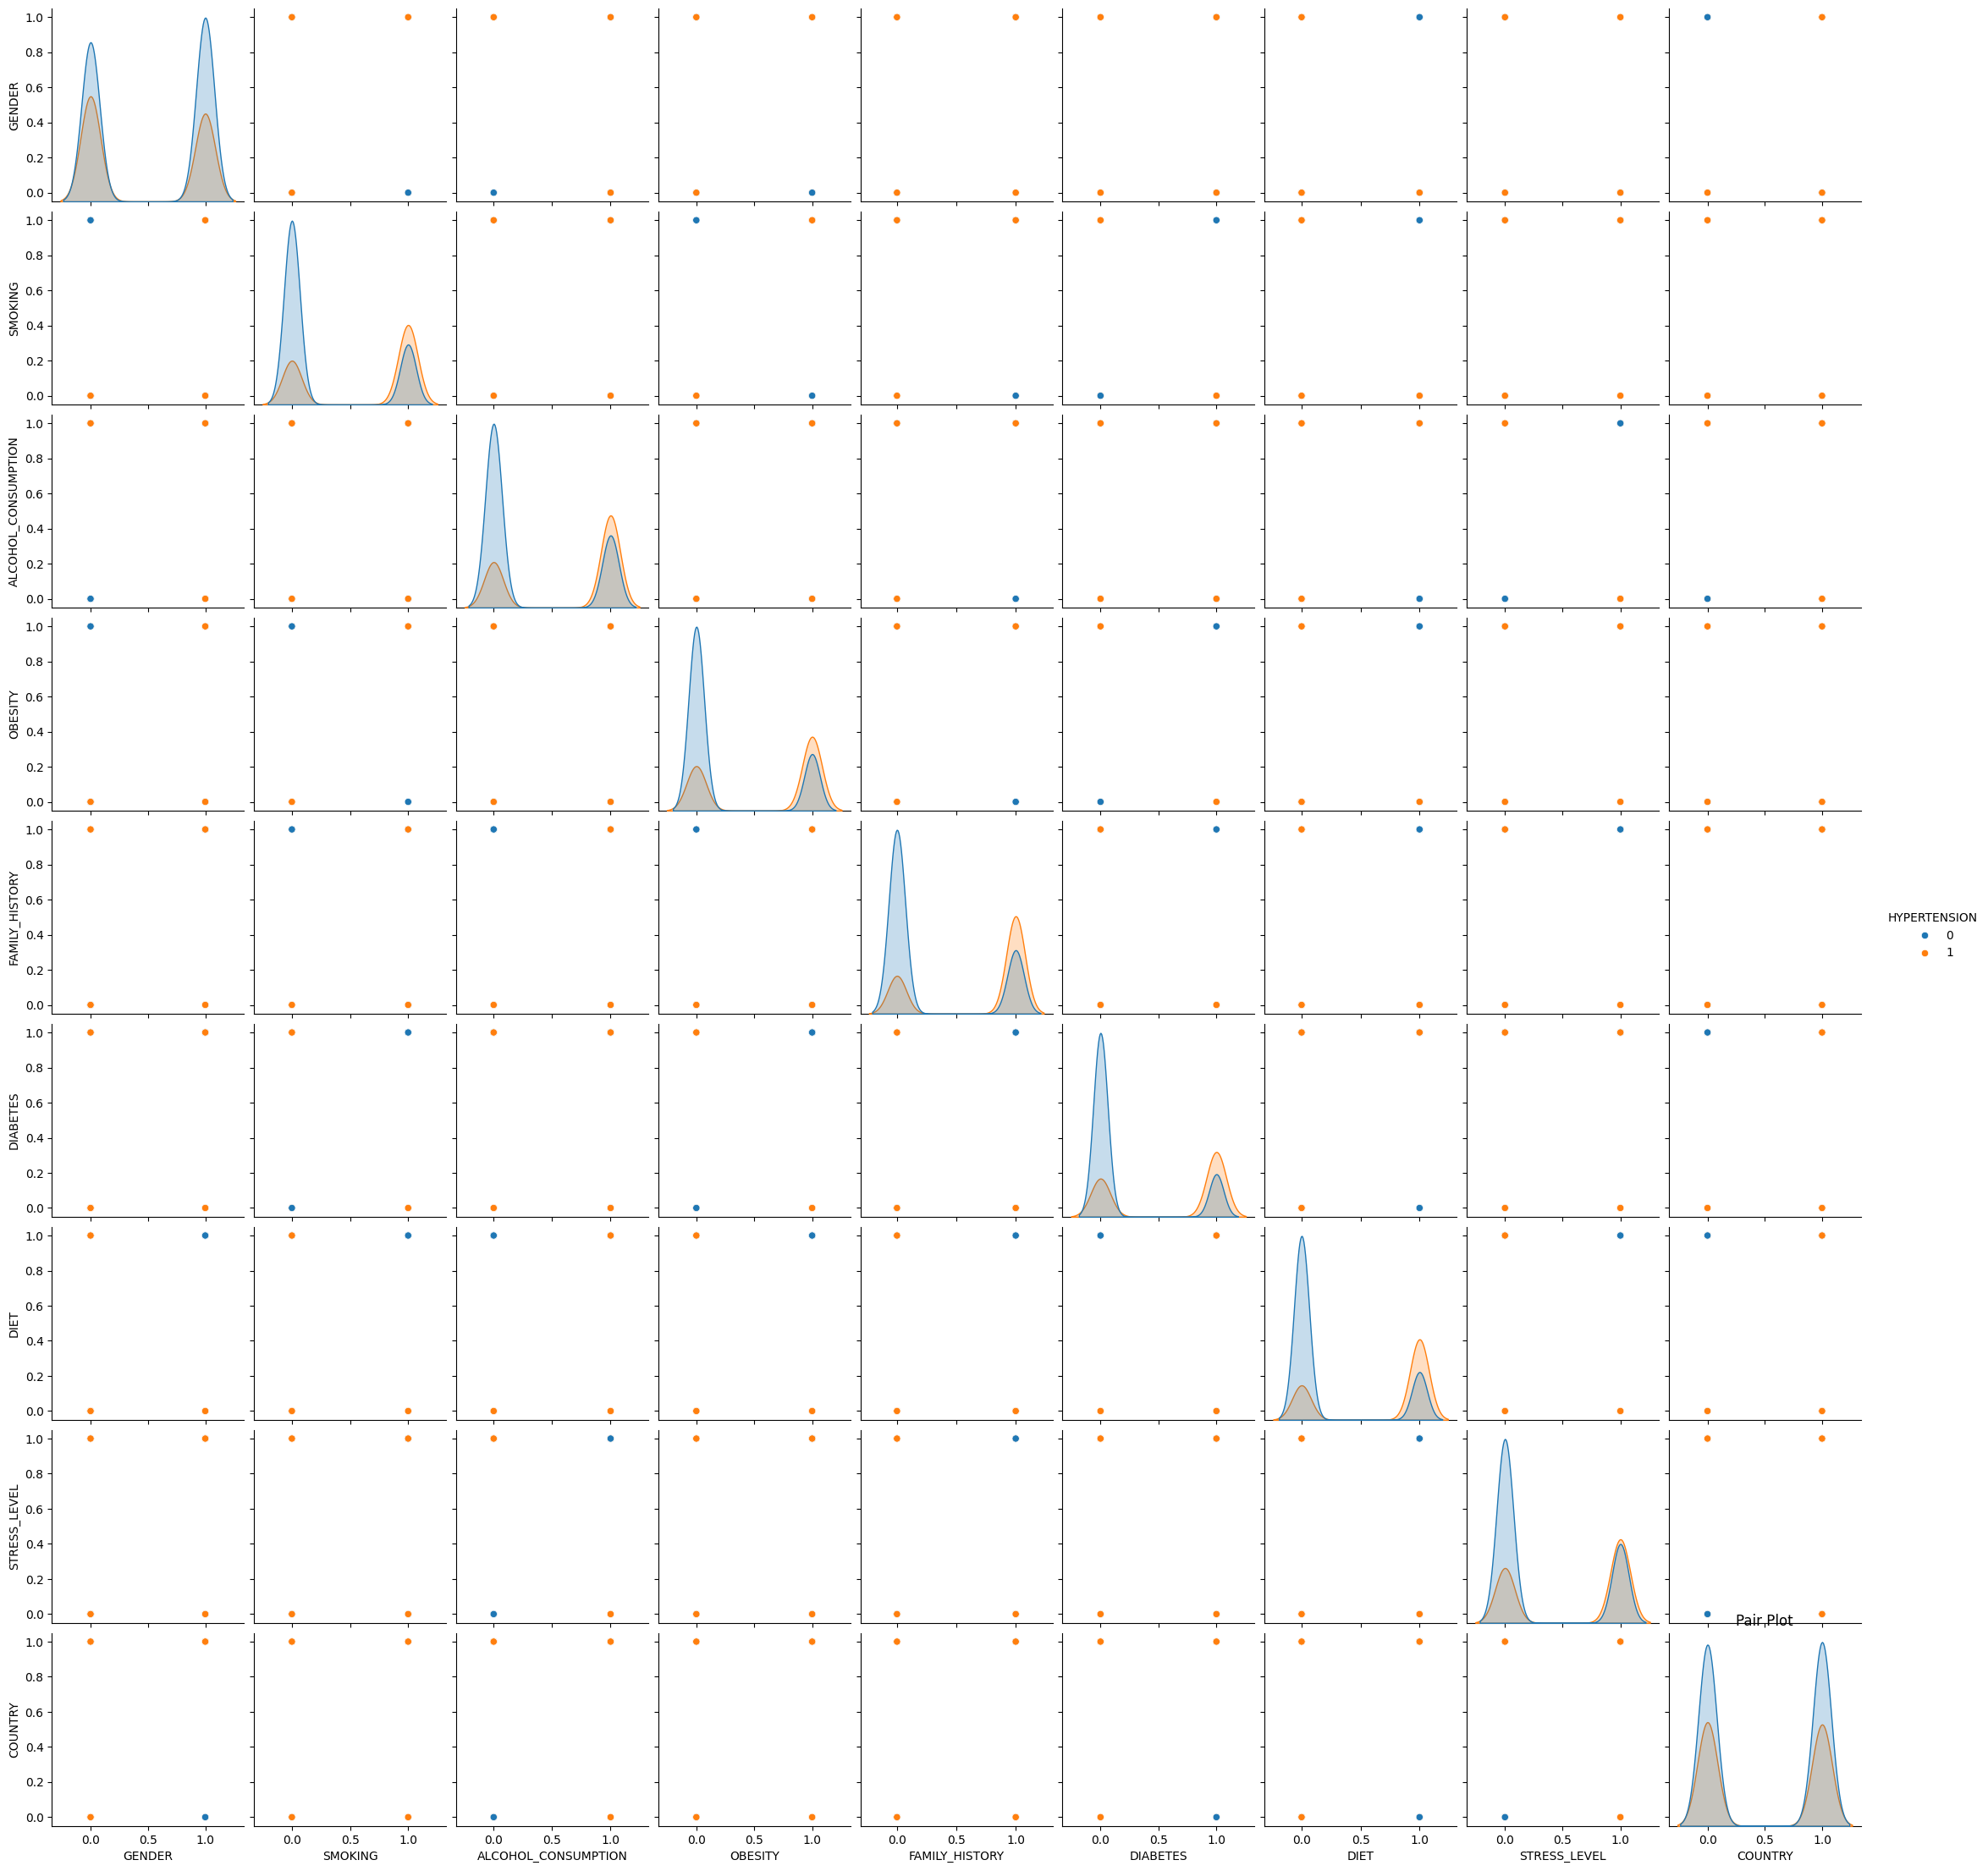

<Figure size 640x480 with 0 Axes>

In [79]:
sns.pairplot(data=data, vars=['GENDER', 'SMOKING', 'ALCOHOL_CONSUMPTION', 'OBESITY', 'FAMILY_HISTORY', 'DIABETES', 'DIET', 'STRESS_LEVEL', 'COUNTRY'], hue='HYPERTENSION')
plt.title('Pair Plot')
plt.show()
plt.tight_layout()

**b. Correlation Matrix of Numerical Features**

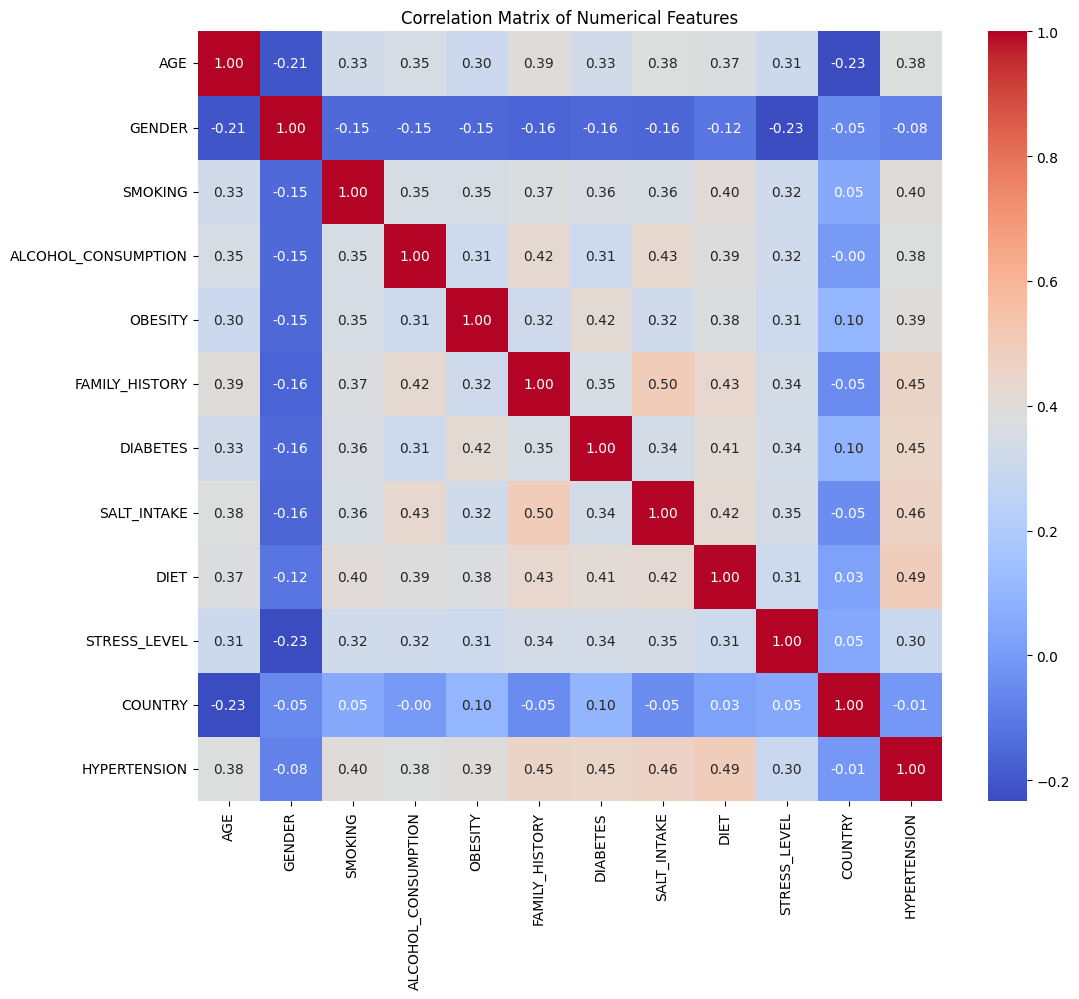

In [80]:
#we define a function to plot a correlation matrix for numerical features
def plot_correlation_matrix(df):

    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    corr_matrix = numerical_features.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

#we use the function to plot the correlation matrix for df2
plot_correlation_matrix(data)

# **2. DATA PREPROCESSING**

In [81]:
#we preview our data again
data.head()

,AGE,GENDER,SMOKING,ALCOHOL_CONSUMPTION,OBESITY,FAMILY_HISTORY,DIABETES,SALT_INTAKE,DIET,STRESS_LEVEL,COUNTRY,HYPERTENSION
0,38,0,0,0,0,0,0,0,0,0,0,0
1,30,1,0,0,0,0,0,0,0,0,0,0
2,40,0,0,0,0,0,0,0,0,0,0,0
3,51,0,1,1,0,1,0,1,0,1,0,0
4,55,1,1,1,1,1,1,1,1,1,0,1


We check for oversampling in our target variable 'Hypertension'

In [82]:
hypertension_counts = data['HYPERTENSION'].value_counts(normalize=True) * 100

hypertension_counts

HYPERTENSION
0    61.775
1    38.225
Name: proportion, dtype: float64

**We separate our target variable (Hypertension) and the independent variables (predictors).**

In [83]:
data.columns

Index(['AGE', 'GENDER', 'SMOKING', 'ALCOHOL_CONSUMPTION', 'OBESITY',
       'FAMILY_HISTORY', 'DIABETES', 'SALT_INTAKE', 'DIET', 'STRESS_LEVEL',
       'COUNTRY', 'HYPERTENSION'],
      dtype='object')

In [84]:
# Separate predictor and target variable
X = data.drop('HYPERTENSION', axis = 1)
y = data['HYPERTENSION']

**We split the data into training & testing set, in the ratio 70/30.**

In [85]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# **3. MODELLING**

Because this is a classification problem our first model would be logistic regression.

## **Model 1(Baseline Model): Logistic Regression**

In [86]:
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("confusion matrix: \n", confusion_matrix(y_test, predictions))

Accuracy: 0.7854166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      3004
           1       0.73      0.68      0.70      1796

    accuracy                           0.79      4800
   macro avg       0.77      0.77      0.77      4800
weighted avg       0.78      0.79      0.78      4800

confusion matrix: 
 [[2540  464]
 [ 566 1230]]


**We test for overfitting**

To confirm the model is not overfitting

1. we run a cross validation
2. we perform a regularization for reducing the model's complexity and promoting better generalization to new data

**K-fold validation for Logistic Regression**

In [88]:
model = LogisticRegression(max_iter=1000)

#10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores and the mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-Validation Scores: [0.78625  0.77625  0.798125 0.786875 0.784375 0.784375 0.779375 0.78625
 0.803125 0.76625 ]
Mean Cross-Validation Score: 0.7851250000000001
Standard deviation: 0.009837746184975491


In [97]:
# checking for overfitting
model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7839285714285714
Test Accuracy: 0.7854166666666667


## **Model 2: KNN (K-Nearest Neighbors) Classifier**

In [90]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("\nK-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))



K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.796875
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      3004
           1       0.72      0.74      0.73      1796

    accuracy                           0.80      4800
   macro avg       0.78      0.78      0.78      4800
weighted avg       0.80      0.80      0.80      4800

Confusion Matrix:
 [[2500  504]
 [ 471 1325]]


**K-fold validation for KNN**

In [98]:
model = KNeighborsClassifier()

#10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores and the mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-Validation Scores: [0.793125 0.79125  0.8075   0.80625  0.813125 0.801875 0.8025   0.808125
 0.83     0.789375]
Mean Cross-Validation Score: 0.8043125
Standard deviation: 0.011375858484088121


**We check for overfitting**

In [99]:
# Checking for overfitting
model = KNeighborsClassifier()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#accuracy score
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8635714285714285
Test Accuracy: 0.796875


## **Model 3: Support Vector Machine (SVM) Classifier**

In [100]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Support Vector Machine (SVM) Classifier:
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      3004
           1       0.70      0.78      0.74      1796

    accuracy                           0.79      4800
   macro avg       0.78      0.79      0.78      4800
weighted avg       0.80      0.79      0.79      4800

Confusion Matrix:
 [[2389  615]
 [ 393 1403]]


**We check for overfitting**

In [101]:
# Checking for overfiiting
model = SVC()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7882142857142858
Test Accuracy: 0.79


## **Model 4: Gradient Boosting (XG) Classifier**

In [102]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))


Gradient Boosting Classifier:
Accuracy: 0.8052083333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      3004
           1       0.74      0.75      0.74      1796

    accuracy                           0.81      4800
   macro avg       0.79      0.79      0.79      4800
weighted avg       0.81      0.81      0.81      4800

Confusion Matrix:
 [[2525  479]
 [ 456 1340]]


**We check for overfitting**

In [103]:
#checking for overfitting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#printing the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8199107142857143
Test Accuracy: 0.8052083333333333


**K-fold validation for xGBoost**

In [121]:
model = GradientBoostingClassifier()
#100-fold cross-validation
kf = KFold(n_splits=100, shuffle=True, random_state=39)
cv_scores = cross_val_score(model, X, y, cv=kf)
#printing scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-Validation Scores: [0.84375 0.8125  0.79375 0.8375  0.78125 0.8     0.75    0.79375 0.79375
 0.83125 0.8125  0.8     0.79375 0.75625 0.7375  0.78125 0.80625 0.8625
 0.8375  0.7875  0.85625 0.775   0.83125 0.825   0.8125  0.8     0.8125
 0.83125 0.7875  0.8     0.79375 0.8     0.7875  0.84375 0.8     0.7875
 0.8125  0.84375 0.75    0.74375 0.775   0.7625  0.79375 0.7875  0.8
 0.84375 0.81875 0.80625 0.84375 0.78125 0.84375 0.8125  0.775   0.80625
 0.8     0.8125  0.79375 0.79375 0.79375 0.81875 0.81875 0.80625 0.8625
 0.8125  0.83125 0.81875 0.83125 0.775   0.8375  0.80625 0.85625 0.825
 0.8     0.7875  0.78125 0.775   0.8125  0.75625 0.80625 0.79375 0.825
 0.78125 0.84375 0.85    0.8125  0.7625  0.825   0.83125 0.78125 0.83125
 0.85625 0.80625 0.7625  0.85625 0.81875 0.825   0.8125  0.8     0.7875
 0.8375 ]
Mean Cross-Validation Score: 0.8066874999999999
Standard deviation: 0.027940436087326916


## **Model 5: AdaBoost Classifier**

In [104]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

print("\nAdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, ada_predictions))
print("Classification Report:\n", classification_report(y_test, ada_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_predictions))

c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier:
Accuracy: 0.7891666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      3004
           1       0.73      0.70      0.71      1796

    accuracy                           0.79      4800
   macro avg       0.78      0.77      0.77      4800
weighted avg       0.79      0.79      0.79      4800

Confusion Matrix:
 [[2530  474]
 [ 538 1258]]


**We check for overfitting**

In [105]:
# Checking for overfitting
model =AdaBoostClassifier()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.7860714285714285
Test Accuracy: 0.7891666666666667


## **Model 6: Decision Tree Classifier**

In [106]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Classifier:
Accuracy: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      3004
           1       0.72      0.70      0.71      1796

    accuracy                           0.78      4800
   macro avg       0.77      0.77      0.77      4800
weighted avg       0.78      0.78      0.78      4800

Confusion Matrix:
 [[2508  496]
 [ 544 1252]]


**We check for overfitting**

In [107]:
# Checking for overfitting
model =DecisionTreeClassifier()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9853571428571428
Test Accuracy: 0.7835416666666667


We perform cross-validation

In [108]:
model = DecisionTreeClassifier()

#10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores and the mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-Validation Scores: [0.78375  0.779375 0.790625 0.786875 0.79625  0.7925   0.78375  0.78875
 0.801875 0.78875 ]
Mean Cross-Validation Score: 0.78925
Standard deviation: 0.006204836822995434


In [109]:
# checking for overfitting
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8020535714285715
Test Accuracy: 0.7941666666666667


## **Model 7: Random Forest Classifier**

In [110]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.79625
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      3004
           1       0.73      0.72      0.73      1796

    accuracy                           0.80      4800
   macro avg       0.78      0.78      0.78      4800
weighted avg       0.80      0.80      0.80      4800

Confusion Matrix:
 [[2525  479]
 [ 499 1297]]


**We check for overfitting**

In [111]:
# Checking for overfitting
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9853571428571428
Test Accuracy: 0.7939583333333333


**We perform a grid search to hypertune the parameters**

In [112]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2']
}

# Create the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Classification report and confusion matrix for the test set
print("Classification Report on Test Set:\n", classification_report(y_test, test_predictions))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, test_predictions))


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.8047916666666667
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      3004
           1       0.74      0.74      0.74      1796

    accuracy                           0.80      4800
   macro avg       0.79      0.79      0.79      4800
weighted avg       0.81      0.80      0.80      4800

Confusion Matrix on Test Set:
 [[2528  476]
 [ 461 1335]]


**We check for overfitting in the chosen hypertuned model**

In [113]:
# Checking for overfitting
model = best_model
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8908035714285715
Test Accuracy: 0.8047916666666667


The model is performing consistently well on both the training and test sets, which suggests good generalization to unseen data. If the metrics were significantly better on the training set than on the test set, it would indicate overfitting, but that is not the case here.

## **Model 8: Neural Networks**

In [57]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model with L2 regularization and dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7130 - loss: 1.1684 - val_accuracy: 0.7781 - val_loss: 0.6596
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.7817 - loss: 0.6266 - val_accuracy: 0.7862 - val_loss: 0.5123
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7843 - loss: 0.5002 - val_accuracy: 0.7844 - val_loss: 0.4650
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7950 - loss: 0.4636 - val_accuracy: 0.7844 - val_loss: 0.4469
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8050 - loss: 0.4297 - val_accuracy: 0.7830 - val_loss: 0.4434
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.7964 - loss: 0.4353 - val_accuracy: 0.7826 - val_loss: 0.4347
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8009 - loss: 0.4264 - val_accuracy: 0.7906 - val_loss: 0.4297
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8028 - loss: 0.4

# **4. DEPLOYMENT OF MODEL**

## **Pickling the model for deployment**

We saved our optimized Random Forest model in a pickle file to preserve the state of the model for future use, especially for deployment purposes. By saving the model in a pickle file, we ensured that all the parameters and learned features of the Random Forest are preserved, making the model readily available for future use without the need to retrain.

In [114]:
import pickle

# Save the model to disk
filename = 'finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gb_model, file)